In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


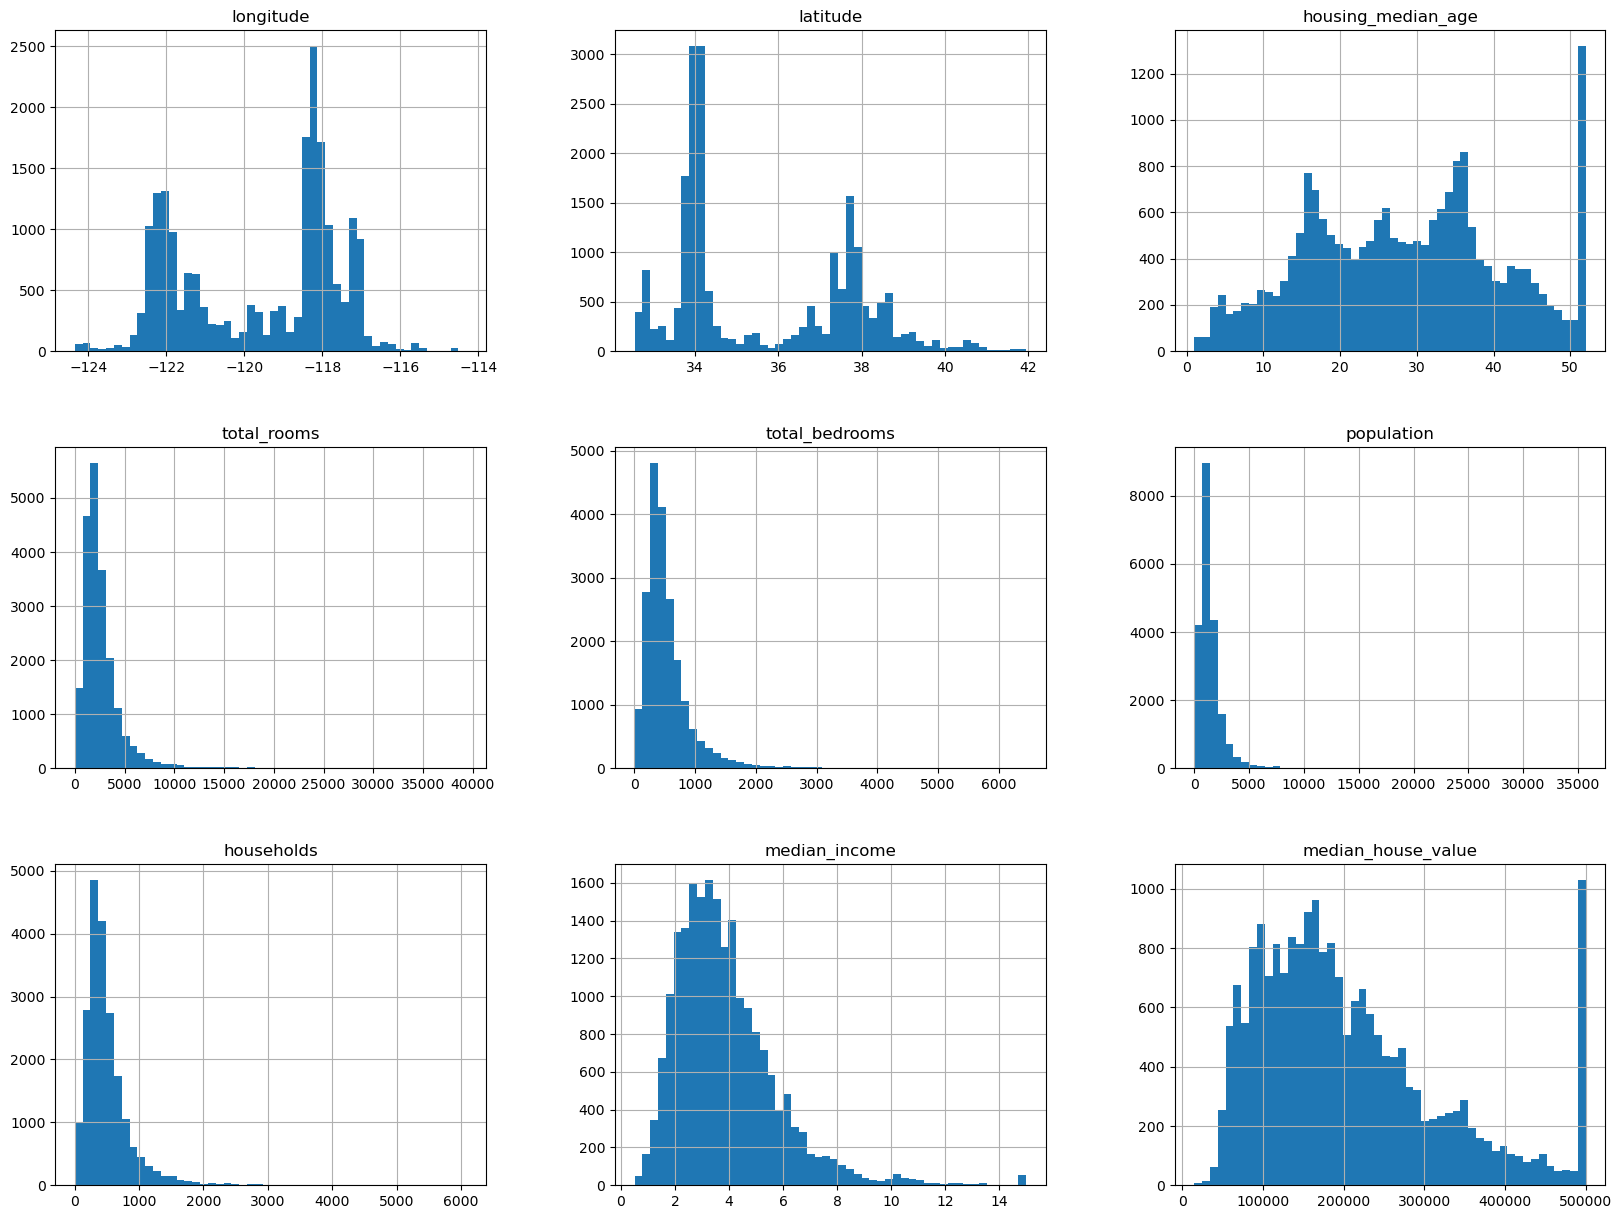

In [5]:
housing.hist(bins = 50, figsize = (20,15));

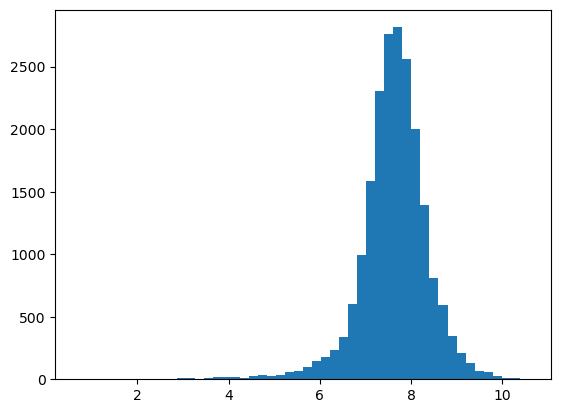

In [6]:
plt.hist(np.log(housing['total_rooms']),bins = 50);

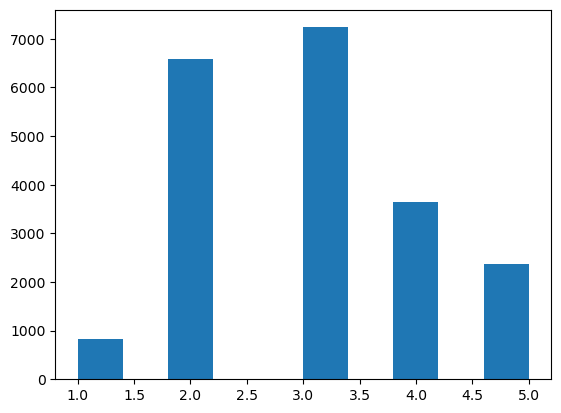

In [7]:
housing['income_cut'] = pd.cut(housing['median_income'],
                              bins = [0,1.5,3,4.5,6,np.inf],
                              labels = [1,2,3,4,5])
plt.hist(housing['income_cut']);

In [8]:
housing.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

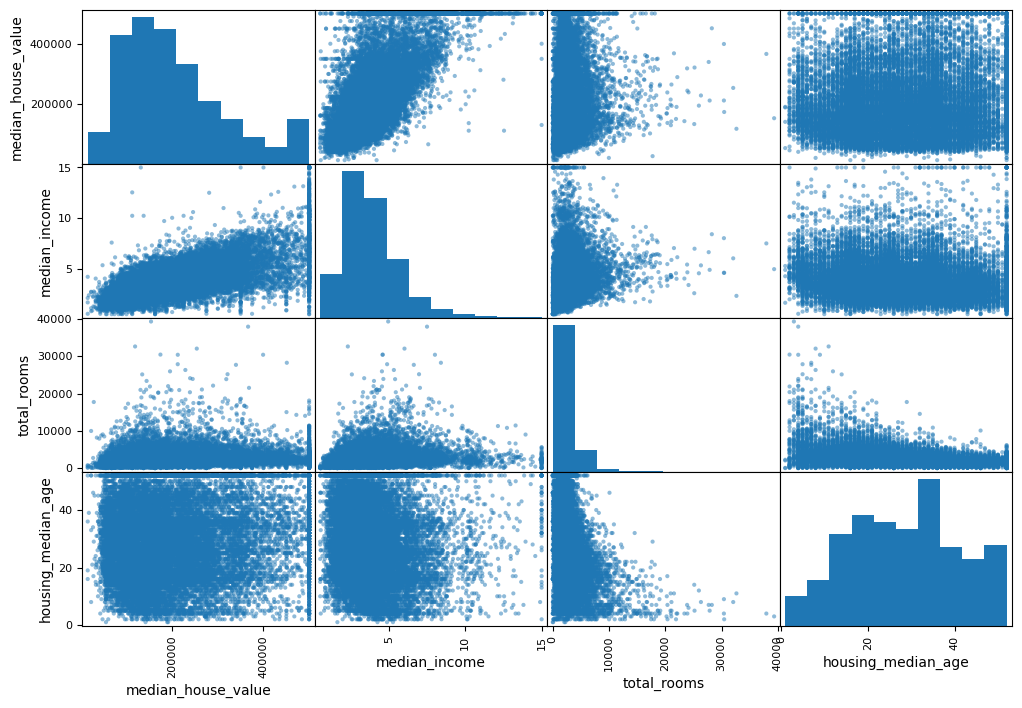

In [9]:
from pandas.plotting import scatter_matrix
atributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[atributes],figsize = (12,8));

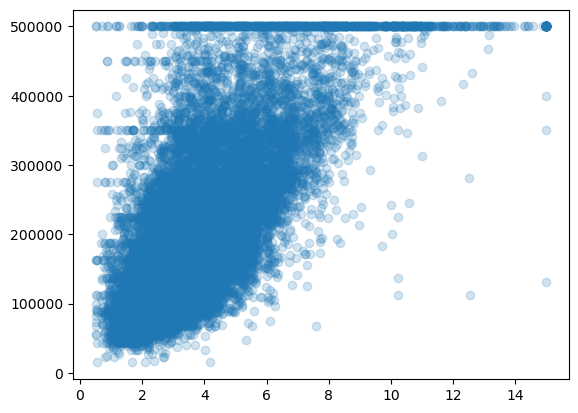

In [10]:
plt.scatter(housing['median_income'],housing['median_house_value'],alpha = 0.2);

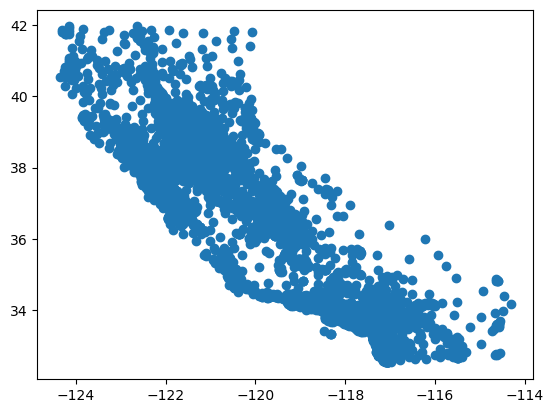

In [11]:
plt.scatter(housing['longitude'],housing['latitude']);

<Axes: xlabel='longitude', ylabel='latitude'>

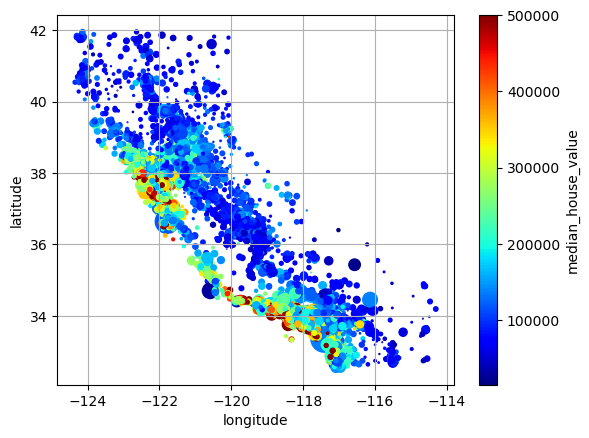

In [12]:
housing.plot(kind = 'scatter', x= 'longitude', y = 'latitude',grid = True,c = 'median_house_value',cmap = 'jet',colorbar = True, s = housing['population']/100)

In [13]:
housing['people_per_house'] = housing['population']/housing['households']
housing['bedrooms ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['room_per_house'] = housing['total_rooms']/housing['households']

In [14]:
housing.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
room_per_house        0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms ratio       -0.255880
Name: median_house_value, dtype: float64

In [15]:
housing = housing.drop(housing[housing['median_house_value']>=500000].index)
housing = housing.drop(housing[housing['housing_median_age']>=50].index)

In [16]:
housing['total_bedrooms'] = np.log(housing['total_bedrooms'])
housing['total_rooms'] = np.log(housing['total_rooms'])
housing['population'] = np.log(housing['population'])
housing['households'] = np.log(housing['households'])


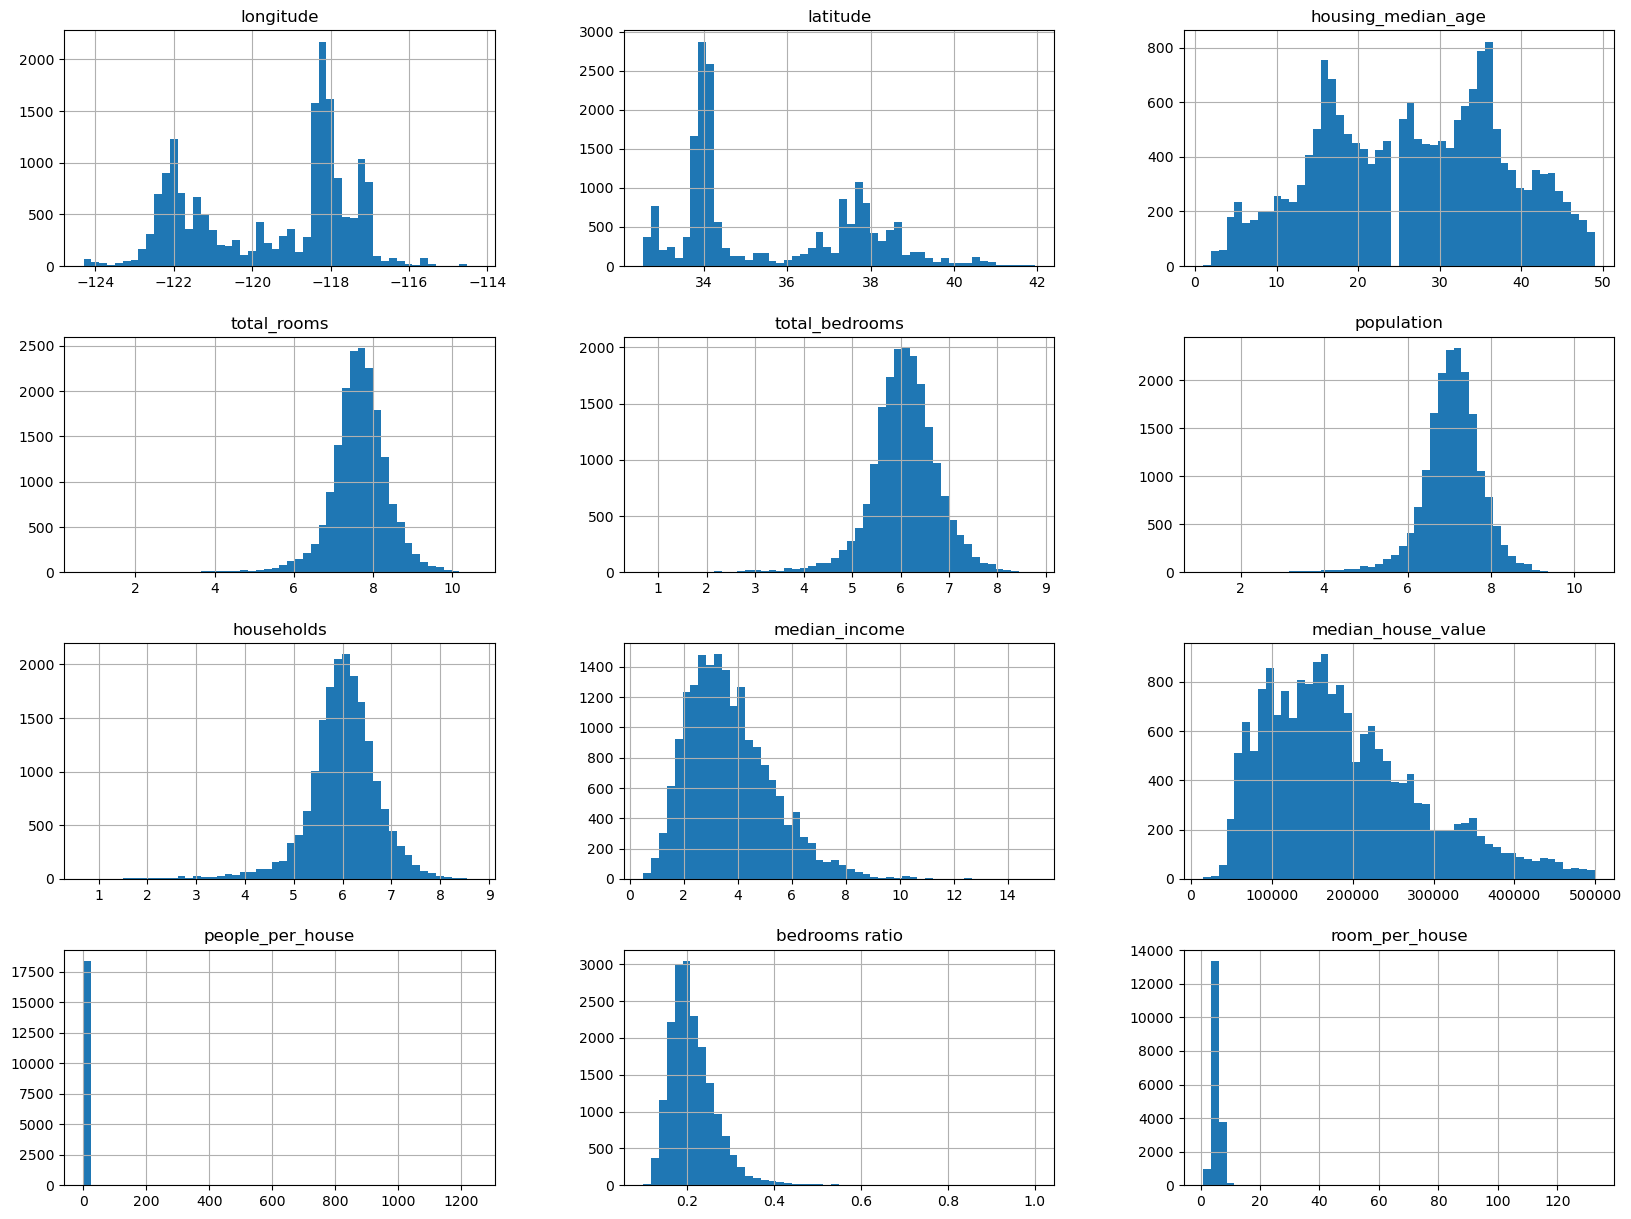

In [17]:
housing.hist(figsize=(20,15),bins = 50);

In [18]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        191
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cut              0
people_per_house        0
bedrooms ratio        191
room_per_house          0
dtype: int64

In [19]:
housing = housing.drop('income_cut',axis = 1)

In [20]:
X = housing.drop('median_house_value',axis = 1)
y = housing['median_house_value'].copy()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor()


In [25]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline 

In [26]:
cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy = 'constant',fill_value = 'Missing')),
    ('onehot',OneHotEncoder(handle_unknown = 'ignore'))
     ])

num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy = 'median')),
    ('scaler',StandardScaler())
])

transformer = ColumnTransformer([
    ('cat_pipeline',cat_pipeline,cat_features),
    ('num_pipeline',num_pipeline,num_features)
])

In [27]:
X_train_transformed = transformer.fit_transform(X_train)
feature_names = transformer.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns = feature_names)

In [28]:
X_train_transformed_df.head(3)

,cat_pipeline__ocean_proximity_<1H OCEAN,cat_pipeline__ocean_proximity_INLAND,cat_pipeline__ocean_proximity_ISLAND,cat_pipeline__ocean_proximity_NEAR BAY,cat_pipeline__ocean_proximity_NEAR OCEAN,num_pipeline__longitude,num_pipeline__latitude,num_pipeline__housing_median_age,num_pipeline__total_rooms,num_pipeline__total_bedrooms,num_pipeline__population,num_pipeline__households,num_pipeline__median_income,num_pipeline__people_per_house,num_pipeline__bedrooms ratio,num_pipeline__room_per_house
0,1.0,0.0,0.0,0.0,0.0,0.735006,-0.840650,0.556566,0.338097,0.100964,0.217144,0.228478,0.833102,-0.022614,-0.723906,0.092159
1,0.0,1.0,0.0,0.0,0.0,1.285642,-0.896569,-1.393079,-0.766305,-1.237537,-1.039229,-1.390946,0.485999,0.046685,-1.144991,1.068071
2,1.0,0.0,0.0,0.0,0.0,0.836041,-0.859290,-0.949977,-2.926985,-2.975968,-3.455727,-2.877265,1.054540,-0.104817,0.018794,-0.264961


In [29]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed,columns = feature_names)
X_test_transformed_df.head(3)

,cat_pipeline__ocean_proximity_<1H OCEAN,cat_pipeline__ocean_proximity_INLAND,cat_pipeline__ocean_proximity_ISLAND,cat_pipeline__ocean_proximity_NEAR BAY,cat_pipeline__ocean_proximity_NEAR OCEAN,num_pipeline__longitude,num_pipeline__latitude,num_pipeline__housing_median_age,num_pipeline__total_rooms,num_pipeline__total_bedrooms,num_pipeline__population,num_pipeline__households,num_pipeline__median_income,num_pipeline__people_per_house,num_pipeline__bedrooms ratio,num_pipeline__room_per_house
0,0.0,0.0,0.0,1.0,0.0,-1.391761,1.037282,0.733807,-0.348540,-0.017340,-0.741221,0.062519,-0.153118,-0.126335,0.949853,-0.645181
1,1.0,0.0,0.0,0.0,0.0,0.452111,-0.705514,1.442769,0.086696,0.014781,-0.258855,-0.028610,2.472465,-0.057696,-0.303912,0.092058
2,0.0,0.0,0.0,0.0,1.0,-1.346296,0.729730,0.733807,1.513135,1.610881,1.184927,1.337105,0.827009,-0.044569,0.029746,0.252303


In [30]:
rnd_reg.fit(X_train_transformed_df,y_train)

RandomForestRegressor()

In [31]:
rnd_reg.score(X_test_transformed_df,y_test)

0.8079390275812472

In [32]:
from sklearn.metrics import mean_squared_error
preds = rnd_reg.predict(X_test_transformed_df)
mse = mean_squared_error(y_test,preds)
mse

1733536378.5582788

In [33]:
rmse = np.sqrt(mse)
rmse

41635.75841219034

In [34]:
for i in range(50,150,20):
    rnd_reg = RandomForestRegressor(n_estimators = i)
    rnd_reg.fit(X_train_transformed_df,y_train)
    preds = rnd_reg.predict(X_test_transformed_df)
    mse = mean_squared_error(y_test,preds)
    rmse = np.sqrt(mse)
    print(f'n_estimators = {i}, RMSE ={rmse}')

n_estimators = 50, RMSE =41908.833164648066
n_estimators = 70, RMSE =41610.023270058235
n_estimators = 90, RMSE =41422.785344035896
n_estimators = 110, RMSE =41467.740367649225
n_estimators = 130, RMSE =41654.01721238657


In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_reg,X_test_transformed_df,y_test,scoring= 'neg_mean_squared_error',cv =5)
rmse_scores = np.sqrt(-scores)
rmse

41654.01721238657

In [ ]:
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# param_grid = {
#     'n_estimators': [100,200,300],
#     'max_depth': [10,20,None],
#     'min_samples_split':[2,10,20],
#     'min_samples_leaf': [2,5,10],
#     'max_features': ['auto','sqrt','log2']
# }

# grid_search = GridSearchCV(rnd_reg,param_grid,cv = 3, scoring = 'neg_mean_squared_error')
# grid_search.fit(X_train_transformed_df[:1000],y_train[:1000]);

In [ ]:
# grid_search.best_params_

In [ ]:
# best_models = grid_search.best_estimator_.fit(X_train_transformed_df,y_train)

In [ ]:
# best_models.score(X_test_transformed_df,y_test)

In [ ]:
# preds = best_models.predict(X_test_transformed_df)
# mse = mean_squared_error(y_test,preds)
# rmse = np.sqrt(mse)
# rmse

In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest()
outlier_pred = isolation_forest.fit_predict(X_train_transformed)
outlier_pred

In [ ]:
X_train_transformed = X_train_transformed_df.iloc[outlier_pred == 1]
y_train = y_train.iloc[outlier_pred == 1]

In [ ]:
best_model = grid_search.best_estimator_.fit(X_train_transformed,y_train)
best_model.score(X_test_transformed_df,y_test)

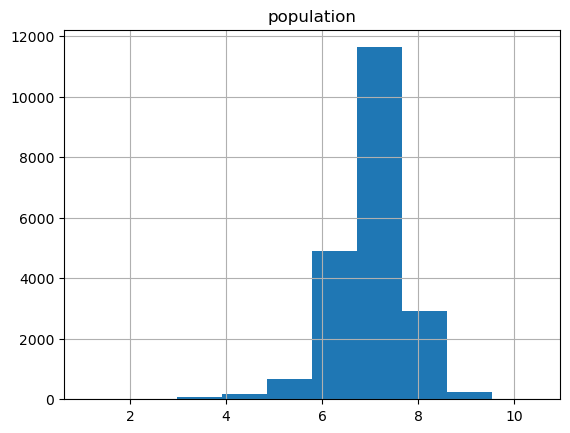

In [38]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer (np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[['population']])
log_pop.hist();

<Axes: >

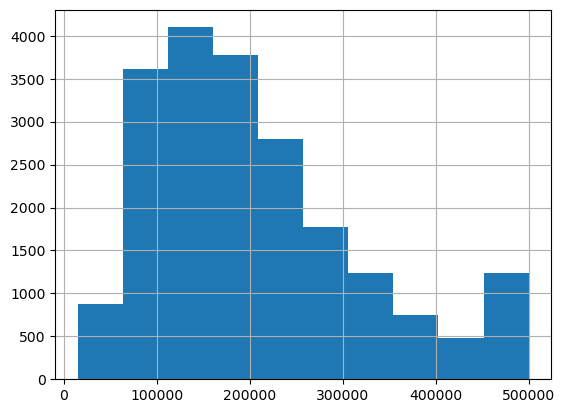

In [39]:
housing['median_house_value'].hist()

In [48]:
housing = pd.read_csv('housing.csv')
X, y = housing.drop('median_house_value', axis=1), housing['median_house_value'].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [49]:
from sklearn.compose import make_column_selector

# X, y = housing.drop('median_house_value', axis=1), housing['median_house_value'].copy()
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [50]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
454,-117.93,33.62,37.0,2204.0,428.0,807.0,410.0,7.0516,<1H OCEAN
16156,-117.25,33.95,5.0,13096.0,2208.0,6780.0,2180.0,4.2775,INLAND
3433,-121.95,38.02,9.0,3360.0,833.0,2041.0,810.0,2.1013,INLAND
6707,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991,<1H OCEAN
15243,-116.89,33.75,23.0,2719.0,538.0,930.0,485.0,2.0154,INLAND
...,...,...,...,...,...,...,...,...,...
17305,-122.56,37.91,52.0,1972.0,327.0,755.0,345.0,7.1924,NEAR BAY
2970,-118.15,33.85,36.0,1491.0,259.0,699.0,266.0,4.0781,<1H OCEAN
17558,-120.47,34.70,24.0,2387.0,385.0,1051.0,382.0,4.4595,NEAR OCEAN
20248,-117.68,33.49,18.0,4173.0,625.0,1649.0,634.0,6.3568,<1H OCEAN


In [51]:
preprocessing.fit_transform(X_train)

array([[-3.10021623e-01, -2.31406467e-02, -9.77117870e-02, ...,
         8.20224189e-01, -9.43691030e-01,  6.61455342e-01],
       [-7.24594729e-01,  2.31584269e-01,  8.55996806e-04, ...,
         1.15995596e+00, -7.88444262e-01, -1.87434983e+00],
       [ 5.60300115e-01, -5.18075518e-01, -5.01060114e-02, ...,
        -1.18819008e+00,  1.12626587e+00, -1.55737418e+00],
       ...,
       [-8.43027718e-01,  3.28901649e-01, -3.01165542e-02, ...,
        -4.48773884e-01, -4.35610699e-01, -3.68715509e-01],
       [-1.02961642e+00,  4.63305498e-01, -4.30968602e-02, ...,
         9.45125574e-01, -1.00484885e+00, -8.44178979e-01],
       [-4.31747187e-01,  1.56621617e-01, -7.64760120e-02, ...,
        -1.37304413e+00,  1.08392585e+00,  8.99187077e-01]])

In [52]:
X_train_transformed = preprocessing.fit_transform(X_train)
feature_names = transformer.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns = feature_names)

X_test_transformed = preprocessing.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed,columns = feature_names)
X_train_transformed_df.head(3)

,cat_pipeline__ocean_proximity_<1H OCEAN,cat_pipeline__ocean_proximity_INLAND,cat_pipeline__ocean_proximity_ISLAND,cat_pipeline__ocean_proximity_NEAR BAY,cat_pipeline__ocean_proximity_NEAR OCEAN,num_pipeline__longitude,num_pipeline__latitude,num_pipeline__housing_median_age,num_pipeline__total_rooms,num_pipeline__total_bedrooms,num_pipeline__population,num_pipeline__households,num_pipeline__median_income,num_pipeline__people_per_house,num_pipeline__bedrooms ratio,num_pipeline__room_per_house
0,-0.310022,-0.023141,-0.097712,0.006645,0.087363,-0.456676,0.044338,1.506741,1.0,0.0,0.0,0.0,0.0,0.820224,-0.943691,0.661455
1,-0.724595,0.231584,0.000856,2.266751,2.471043,2.447289,2.336923,0.440114,0.0,1.0,0.0,0.0,0.0,1.159956,-0.788444,-1.874350
2,0.560300,-0.518076,-0.050106,0.923943,0.651392,0.809296,0.978533,-1.076575,0.0,1.0,0.0,0.0,0.0,-1.188190,1.126266,-1.557374


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error 

models = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
    
]

for model in models:
    model.fit(X_train_transformed_df,y_train)
    print(model.__class__.__name__,  model.score(X_test_transformed_df,y_test))

LinearRegression 0.5814206771889986
SVR -0.03988558411136678
DecisionTreeRegressor 0.6437819453098462
RandomForestRegressor 0.8206323273924074
GradientBoostingRegressor 0.7904814491349933


In [57]:
random_forest_pipeline = Pipeline([
    ('preprocessing',preprocessing),
    ('random_forest',RandomForestRegressor())
])
random_forest_pipeline.fit(X_train,y_train)
random_forest_pipeline.score(X_test,y_test)

0.8212600876465377